In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import kagglehub
import os

warnings.filterwarnings('ignore')

path = kagglehub.dataset_download("amdj3dax/ransomware-detection-data-set")
path = os.path.join(path, "data_file.csv")
print("Path to dataset files:", path)

try:
    df = pd.read_csv(path)
    print("\nDataset loaded successfully.")
    print("\nInitial Data Head:\n", df.head())
    print("\nData Info:")
    df.info()
except FileNotFoundError:
    print("\nError: not found.")
    print("Please download the dataset from https://www.kaggle.com/datasets/amdj3dax/ransomware-detection-data-set")
    print("and place it in the same directory as this Jupyter Notebook.")
    df = pd.DataFrame()
except Exception as e:
    print(f"\nAn error occurred while loading the dataset: {e}")
    df = pd.DataFrame()



Path to dataset files: /home/drunkencloud/.cache/kagglehub/datasets/amdj3dax/ransomware-detection-data-set/versions/1/data_file.csv

Dataset loaded successfully.

Initial Data Head:
                                             FileName  \
0           0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll   
1       05c8318f98a5d301d80000009c316005.vertdll.dll   
2           06054fba-5619-4a86-a861-ffb0464bef5d.dll   
3        075822ac99a5d301660400009c316005.adhapi.dll   
4  090607dd9ba5d301ca0900009c316005.SensorsNative...   

                            md5Hash  Machine  DebugSize  DebugRVA  \
0  79755c51e413ed3c6be4635fd729a6e1      332          0         0   
1  95e19f3657d34a432eada93221b0ea16    34404         84    121728   
2  85c32641d77a54e19ba8ea4ab305c791      332          0         0   
3  62e3b959d982ef534b66f819fe15f085    34404         84     19904   
4  ae38c5f7d313ad0ff3bfb8826476767f    34404         84     97728   

   MajorImageVersion  MajorOSVersion  ExportRVA  ExportSize  IatV

In [3]:
X = df.drop('Benign', axis=1)
y = df['Benign']

non_numeric_cols = X.select_dtypes(include=['object']).columns.tolist()
if non_numeric_cols:
    print(f"\nDropping non-numeric columns: {non_numeric_cols}")
    X = X.drop(columns=non_numeric_cols)
else:
    print("\nNo non-numeric columns found to drop.")

nan_columns = X.columns[X.isnull().any()].tolist()
if nan_columns:
    print(f"\nColumns with NaN values after dropping non-numeric: {nan_columns}")
    imputer = SimpleImputer(strategy='mean')
    X[nan_columns] = imputer.fit_transform(X[nan_columns])
    print("NaN values imputed with mean strategy.")
else:
    print("\nNo NaN values found in features after cleanup.")

print("\nFeatures (X) and Target (y) prepared.")
print(f"X shape: {X.shape}, y shape: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Train set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")



Dropping non-numeric columns: ['FileName', 'md5Hash']

No NaN values found in features after cleanup.

Features (X) and Target (y) prepared.
X shape: (62485, 15), y shape: (62485,)
Train set size: 49988 samples
Test set size: 12497 samples



--- Training RandomForestClassifier ---
Model training complete.

--- Model Evaluation ---
Accuracy: 1.00


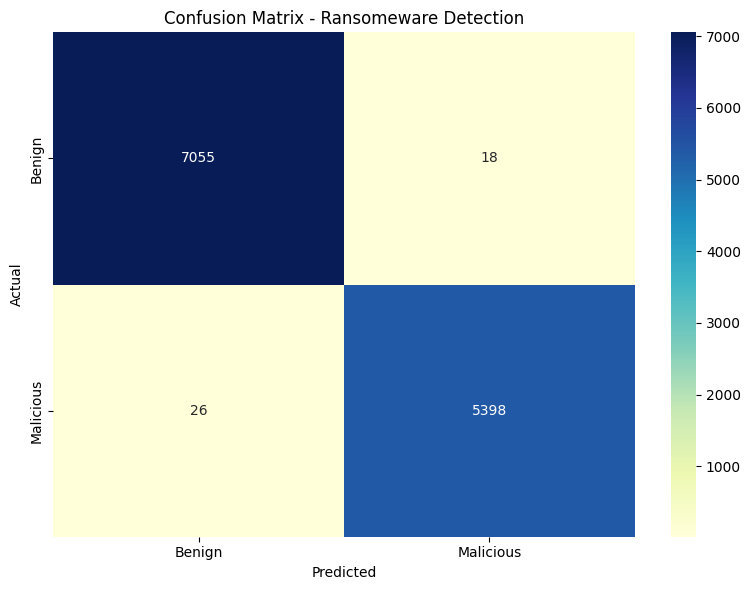


Classification Report:
                        precision    recall  f1-score   support

Ransomware (Malicious)       1.00      1.00      1.00      7073
                Benign       1.00      1.00      1.00      5424

              accuracy                           1.00     12497
             macro avg       1.00      1.00      1.00     12497
          weighted avg       1.00      1.00      1.00     12497



In [4]:
print("\n--- Training RandomForestClassifier ---")
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
print("Model training complete.")

y_pred = model.predict(X_test)

print("\n--- Model Evaluation ---")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=["Benign", "Malicious"], yticklabels=["Benign", "Malicious"])
plt.title("Confusion Matrix - Ransomeware Detection")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

class_names = ['Ransomware (Malicious)', 'Benign']
cr = classification_report(y_test, y_pred, target_names=class_names)
print("\nClassification Report:")
print(cr)


--- Training SVM Classifier ---
SVM model training complete.

--- SVM Model Evaluation ---
Accuracy: 0.78


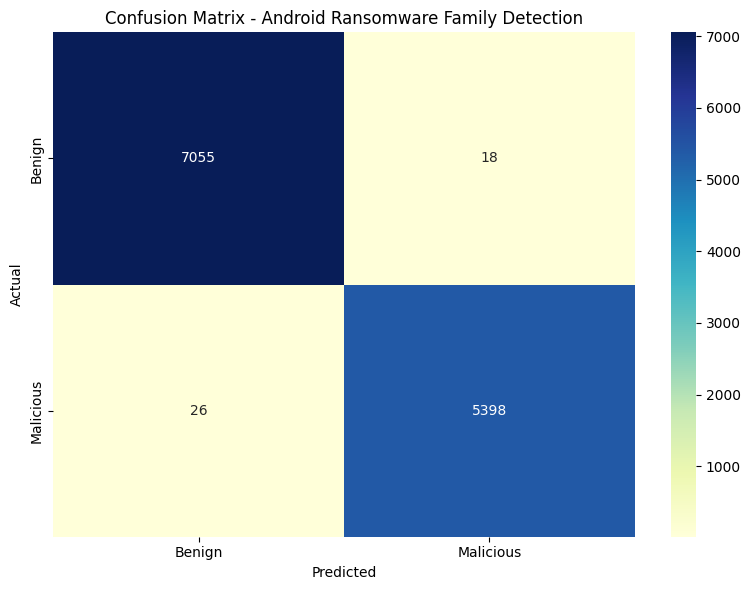


Classification Report (SVM):
                        precision    recall  f1-score   support

Ransomware (Malicious)       0.75      0.94      0.83      7073
                Benign       0.87      0.59      0.70      5424

              accuracy                           0.78     12497
             macro avg       0.81      0.76      0.77     12497
          weighted avg       0.80      0.78      0.77     12497



In [5]:
print("\n--- Training SVM Classifier ---")
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)
print("SVM model training complete.")

y_pred_svm = svm_model.predict(X_test)

print("\n--- SVM Model Evaluation ---")
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm:.2f}")

cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=["Benign", "Malicious"], yticklabels=["Benign", "Malicious"])
plt.title("Confusion Matrix - Android Ransomware Family Detection")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

cr_svm = classification_report(y_test, y_pred_svm, target_names=class_names)
print("\nClassification Report (SVM):")
print(cr_svm)
